In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.ticker as ticker
import numpy as np
import joblib as jb
import matplotlib as mpl
from __future__ import annotations

# TileBitrate with varying tiles (Fig 2b)

In [72]:
# Used the script Results/TileBitratesTests/calc_bitrate.py to get the pickle file
bitrates, bitrates_fg, bitrates_bg =  jb.load("Results/TileBitratesTests/bitrates.pkl")

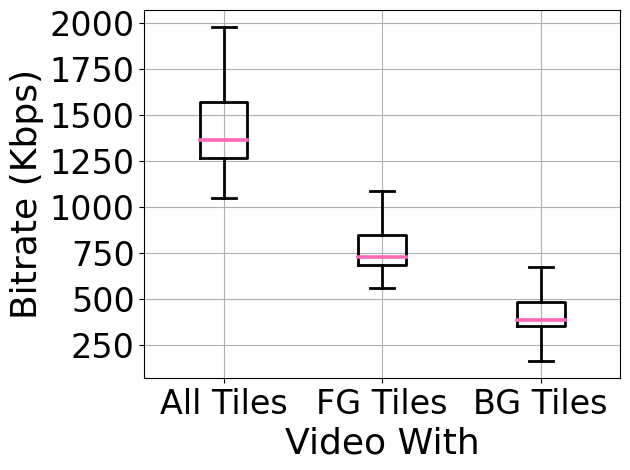

In [73]:
medianprops = dict(linewidth=2.6, color='hotpink')
boxprops = dict(linewidth=2, color='black')
capprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='black')

plt.boxplot([bitrates, bitrates_fg, bitrates_bg], whiskerprops=whiskerprops, capprops=capprops, boxprops=boxprops, showfliers=False, medianprops=medianprops)
plt.xlabel("Video With", fontsize=26)
plt.ylabel("Bitrate (Kbps)", fontsize=26)
plt.xticks([1, 2, 3], ["All Tiles", "FG Tiles", "BG Tiles"], fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.tight_layout()
# plt.savefig("Results/Plots/BR_boxplot_without_outliers.pdf", bbox_inches="tight")

# Tile Shifting Impact (Fig 4)

In [74]:
# used the script Results/TileShiftingImpact/plot.py to get the files
path = sorted(list(Path("Results/TileShiftingImpact/hevc").iterdir()), key=lambda x: int(x.stem[3:]))[:40]
fgsizes, bgsizes = [], []
for i in range(6, 13):
    tmp = []
    for p in path:
        tmp.append(Path(f"Results/TileShiftingImpact/fgTiles/{p.stem}_till{i}.mp4").stat().st_size/1024)
    fgsizes.append(tmp)

    tmp = []
    for p in path:
        tmp.append(Path(f"Results/TileShiftingImpact/bgTiles/{p.stem}_till{i}.mp4").stat().st_size/1024)
    bgsizes.append(tmp)

fgarr = np.array(fgsizes)
bgarr = np.array(bgsizes)

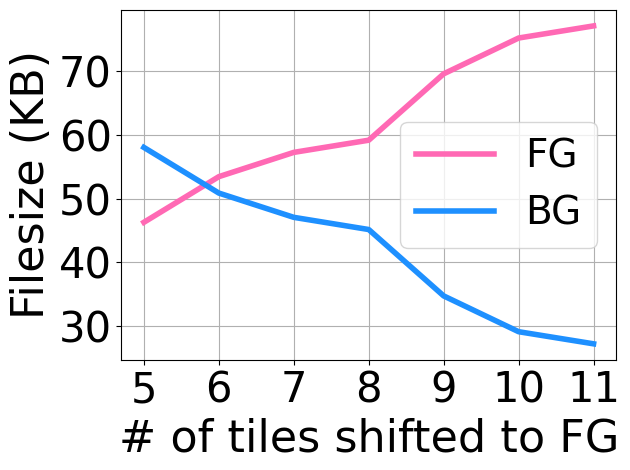

In [ ]:
plt.plot(fgarr.mean(axis=1), label="FG", color="hotpink", linewidth=4)
plt.plot(bgarr.mean(axis=1), label="BG", color="dodgerblue", linewidth=4)
# plt.tight_layout()
plt.grid()
plt.xlabel("# of tiles shifted to FG", fontsize=32)
plt.ylabel("Filesize (KB)", fontsize=32)
plt.xticks(np.arange(7), [i for i in range(5, 12)], fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=28)
plt.tight_layout()
# plt.savefig("Results/Plots/filesize_plot.pdf", bbox_inches="tight")

# Motivation Plot (Fig 5)

In [114]:
trace = "bus"
videos = ["Video2", "Video3", "Video4", "Video5"]
_Methods = ["SP1", "SP2", "PMin", "PBF", "PMu", "TBF", "TMu", "CMin", "Ours"]
# _Methods = ["SP1", "SP2", "P\nminRTT", "P\nBFlow", "P\nMusher", "T\nBFlow", "T\nMusher", "T\nCAminRTT", "COMPACT"]

s_sp1, s_sp2, s_pmin, s_pmu, s_pbf, s_tmin, s_tmu, s_tbf, s_ours = [], [], [], [], [], [], [], [], []
l_sp1, l_sp2, l_pmin, l_pmu, l_pbf, l_tmin, l_tmu, l_tbf, l_ours = [], [], [], [], [], [], [], [], []
for video in videos:
    # E2E lag
    l_ours += jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_pkl_Tours_{video}.pkl")
    l_pmin += jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_pkl_PminRTT_{video}.pkl")
    l_pmu += jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_pkl_Pmusher_{video}.pkl")
    l_pbf += jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_pkl_Pbflow_{video}.pkl")
    l_sp1 += jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_pkl_PSP1_{video}.pkl")
    l_sp2 += jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_pkl_PSP2_{video}.pkl")
    l_tmu += jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_pkl_Tmusher_{video}.pkl")
    l_tmin += jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_pkl_TminRTT_{video}.pkl")
    l_tbf += jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_pkl_Tbflow_{video}.pkl")

    # Stall
    # -40 because 40 is acceptable stall duration
    with open(f"Results/Stalls/traces/{trace}/Multipath_pkt_level_SP1_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]  
    s_sp1 += [(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ]

    with open(f"Results/Stalls/traces/{trace}/Multipath_pkt_level_SP2_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]  
    s_sp2 += [(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ]

    with open(f"Results/Stalls/traces/{trace}/Multipath_pkt_level_minRTT_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]  
    s_pmin += [(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ]

    with open(f"Results/Stalls/traces/{trace}/Multipath_pkt_level_bflow_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]  
    s_pbf += [(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ]

    with open(f"Results/Stalls/traces/{trace}/Multipath_pkt_level_musher_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]   
    s_pmu += [(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ]

    with open(f"Results/Stalls/traces/{trace}/Multipath_tilelevel_bflow_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]    
    s_tbf += [(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ]

    with open(f"Results/Stalls/traces/{trace}/Multipath_tilelevel_musher_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1] 
    s_tmu += [(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ]

    with open(f"Results/Stalls/traces/{trace}/Multipath_tilelevel_minRTT_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]   
    s_tmin += [(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ]

    with open(f"Results/Stalls/traces/{trace}/Multipath_tilelevel_ours_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]  
    s_ours += [(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ]

# SP1, SP2, PminRTT, Pbflow, Pmusher, TminRTT, Tbflow, Tmusher, ours
mot_stalls_mean = [np.median(s_sp1)/1000, np.median(s_sp2)/1000, np.median(s_pmin)/1000, np.median(s_pbf)/1000, np.median(s_pmu)/1000, np.median(s_tmin)/1000, np.median(s_tbf)/1000, np.median(s_tmu)/1000]#, np.median(s_ours)]
mot_lags_mean = [np.median(l_sp1), np.median(l_sp2), np.median(l_pmin), np.median(l_pbf), np.median(l_pmu), np.median(l_tmin), np.median(l_tbf), np.median(l_tmu)]#, np.median(l_ours)]
# mot_stalls_std = [np.std(s_sp1)/1000, np.std(s_sp2)/1000, np.std(s_pmin)/1000, np.std(s_pbf)/1000, np.std(s_pmu)/1000, np.std(s_tmin)/1000, np.std(s_tbf)/1000, np.std(s_tmu)/1000]#, np.std(s_ours)]
# mot_lags_std = [np.std(l_sp1), np.std(l_sp2), np.std(l_pmin), np.std(l_pbf), np.std(l_pmu), np.std(l_tmin), np.std(l_tbf), np.std(l_tmu)]#, np.std(l_ours)]

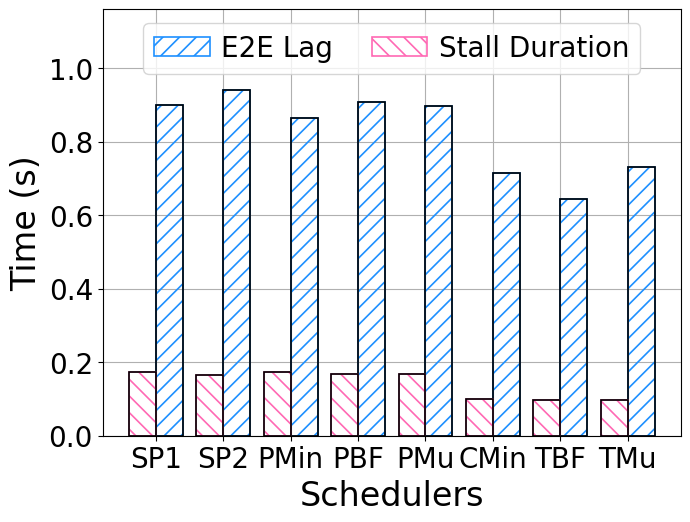

In [120]:
_colors = ["blue", "black", "dimgrey", "limegreen", "darkorange", "brown", "teal", "hotpink"]#, 'dodgerblue']
# _Methods = ["SP1", "SP2", "PMinRTT", "PBFlow", "PMusher", "TBFlow", "TMusher", "CAMinRTT", "COMPACT"]
_Methods = ["SP1", "SP2", "PMin", "PBF", "PMu", "CMin", "TBF", "TMu"]#, "COMPACT"]
_markers = ["+", "<", "o", "d", "*", "v", "s", "h"]#, "p"]

# plt.figure(figsize=(9, 7))
plt.bar(np.arange(len(mot_lags_mean)) + 0.2, mot_lags_mean, width=0.4, label="E2E Lag", linewidth=1.2, edgecolor="dodgerblue", fill=False, hatch="//", zorder=2)#, yerr=mot_lags_std)
plt.bar(np.arange(len(mot_lags_mean)) + 0.2, mot_lags_mean, width=0.4, linewidth=1.2, edgecolor="k", fill=False, zorder=2)
plt.bar(np.arange(len(mot_stalls_mean)) - 0.2, mot_stalls_mean, width=0.4, label="Stall Duration", linewidth=1.2, edgecolor="hotpink", fill=False, hatch="\\\\", zorder=2)#, yerr=mot_stalls_std)
plt.bar(np.arange(len(mot_stalls_mean)) - 0.2, mot_stalls_mean, width=0.4, linewidth=1.2, edgecolor="k", fill=False, zorder=2)
plt.tight_layout()
plt.ylim(0, 1.16)
plt.xlabel("Schedulers", fontsize=24)
plt.ylabel("Time (s)", fontsize=24)
plt.xticks(np.arange(len(_Methods)), _Methods, fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.legend(fontsize=20, ncol=2, loc="upper center", columnspacing=1.4, handletextpad=0.4)
# plt.tight_layout()
plt.savefig(f"Results/Plots/motivation_barplot_allvideo_bus.pdf", bbox_inches="tight")
# plt.savefig(f"Results/Plots/motivation_barplot_allvideo_bus.png", bbox_inches="tight")

# QP vs Bitrate (Fig 8)

In [88]:
# Used the Results/Qp_Vs_Filesize/script.py to get the pickle file
brs = np.array(jb.load("Results/QP_vs_filesize/bitrates.pkl")).astype(int)
brs_mean = np.mean(brs, axis=1)
brs_stds = np.std(brs, axis=1)
# print(brs_mean)
# Printing the change factor
change  = brs_mean[:-1]/brs_mean[1:]
# print(change)
# print(_size)


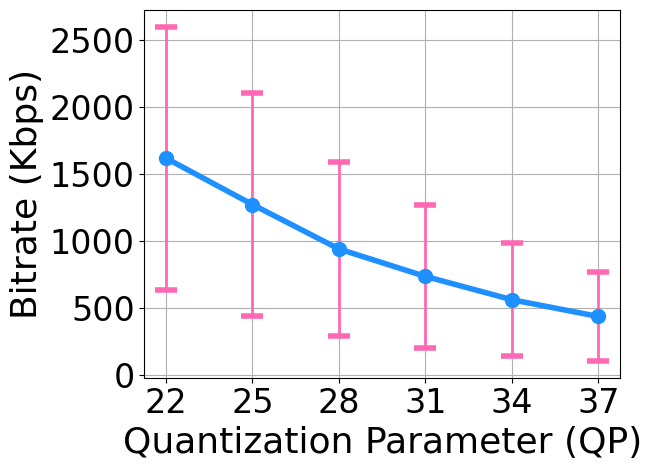

In [89]:
# Plotting
qp = [22, 25, 28, 31, 34, 37]
# plt.plot(brs_mean)
plt.errorbar(x=np.arange(len(qp)), y=brs_mean, yerr=brs_stds, fmt="-o", capsize=8, ecolor="hotpink", color="dodgerblue", elinewidth=2, linewidth=4, capthick=4, markersize=10)
plt.grid()
plt.xlabel("Quantization Parameter (QP)", fontsize=26)
plt.ylabel("Bitrate (Kbps)", fontsize=26)
plt.xticks([i for i in range(len(qp))], qp, fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
plt.savefig(f"Results/Plots/br_vs_qp_curve.pdf", bbox_inches="tight")      

# Filesize vs # of frames (Fig 9)

In [90]:
# Used the Results/EncodingvsNumFrames/enc.py script to generate the pickle file
size_f_25 = np.array(jb.load("Results/EncodingvsNumFrames/size_25fps_static.pkl")).mean(axis=1)
size_f_30 = np.array(jb.load("Results/EncodingvsNumFrames/size_30fps_static.pkl")).mean(axis=1)

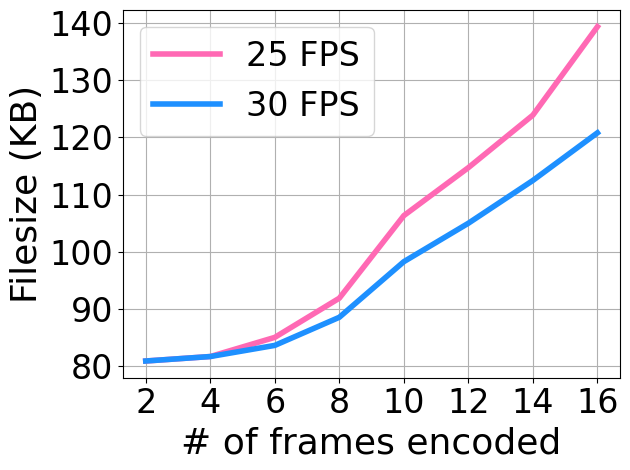

In [91]:
numFrames = [2, 4, 6, 8, 10, 12, 14, 16]
plt.plot(size_f_25, color="hotpink", label="25 FPS", linewidth=4)
plt.plot(size_f_30, color="dodgerblue", label="30 FPS", linewidth=4)
plt.ylabel("Filesize (KB)", fontsize=26)
plt.xlabel("# of frames encoded", fontsize=26)
plt.xticks(np.arange(len(numFrames)), numFrames, fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.legend(fontsize=24)
plt.tight_layout()
plt.savefig('Results/Plots/Filesize_vs_frames.pdf', bbox_inches="tight")

# Stall (Fig 12a)

In [92]:
# Change trace name to get corresponding plot (Car, Bus, Walk)
# Plotting stall
trace_cap = "Walk"
trace = trace_cap.lower()
videos = ["Video2", "Video3", "Video4", "Video5"]
_Methods = ["SP1", "SP2", "PMin", "PBF", "PMu", "TBF", "TMu", "CMin", "COMPACT"]
# _Methods = ["SP1", "SP2", "P\nminRTT", "P\nBFlow", "P\nMusher", "T\nBFlow", "T\nMusher", "T\nCAminRTT", "COMPACT"]
schedulers = ["pkt_level_SP1", "pkt_level_SP2", "pkt_level_minRTT", "pkt_level_bflow", "pkt_level_musher", "tilelevel_bflow", "tilelevel_musher", "tilelevel_minRTT", "tilelevel_ours"]

# Stall
stalls = [] # stalls with dim0 = videos, dim1 = schedulers, and dim3 = samples
for video in videos:
    st = [] # to store stalls for scheduler in the order
            # SP1, SP2, PminRTT, Pbflow, Pmusher, TminRTT, Tbflow, Tmusher, ours
    
    for scheduler in schedulers:
        # -40 because 40 is acceptable stall duration
        with open(f"Results/Stalls/traces/{trace}/Multipath_{scheduler}_{trace}_{video}.txt" , "r") as f:
            d = f.read().split("\n")[20:-1]  
        st.append([(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ])
    stalls.append(st)

# Concatenate all videos together
concatedStalls, concatedStallsMedian, concatedStalls99thPerc = [], [], [] # schedulers
for sc in range(len(_Methods)):
    tmp = []
    for vd in range(len(videos)):
        tmp += stalls[vd][sc]
    concatedStalls.append(tmp)
    concatedStallsMedian.append(np.median(tmp))
    concatedStalls99thPerc.append(np.percentile(tmp, 99))

In [726]:
# # len(concatedStalls[8])
# concatedStallsMedian # bus sp=3.4x, Pbf=3.5x, Tbf=2x 
# concatedStalls99thPerc # bus sp1=2.1x, sp2=6.2x, Pmin=2.1x, Pmu=4.6x, Tbf=4.1x, cmin=5.2x 
# concatedStalls99thPerc # car sp1=5.2x, sp2=1.5x, Pmin=1.5x, Pmu=4.4x, Tbf=2.6x, cmin=2.7x 
# concatedStalls99thPerc # walk sp1=1.9x, sp2=1.9x, Pmin=1.9x, Pmu=2x, Tbf=1.1x, cmin=1.2x 

In [727]:
# concatedStallsMedian # car sp=2.9x, Pbf=2.4x, CMin=1.9x
# concatedStalls99thPerc # car sp1=5.2x, sp2=1.5x, Pmin=1.5x, Pmu=4.4x, Tbf=2.6x, cmin=2.7x 

In [728]:
# concatedStallsMedian # walk sp=approx3x, Pmin=3x, Cmin=1.9x
# concatedStalls99thPerc # walk sp1=1.9x, sp2=1.9x, Pmin=1.9x, Pmu=2x, Tbf=1.1x, cmin=1.2x 

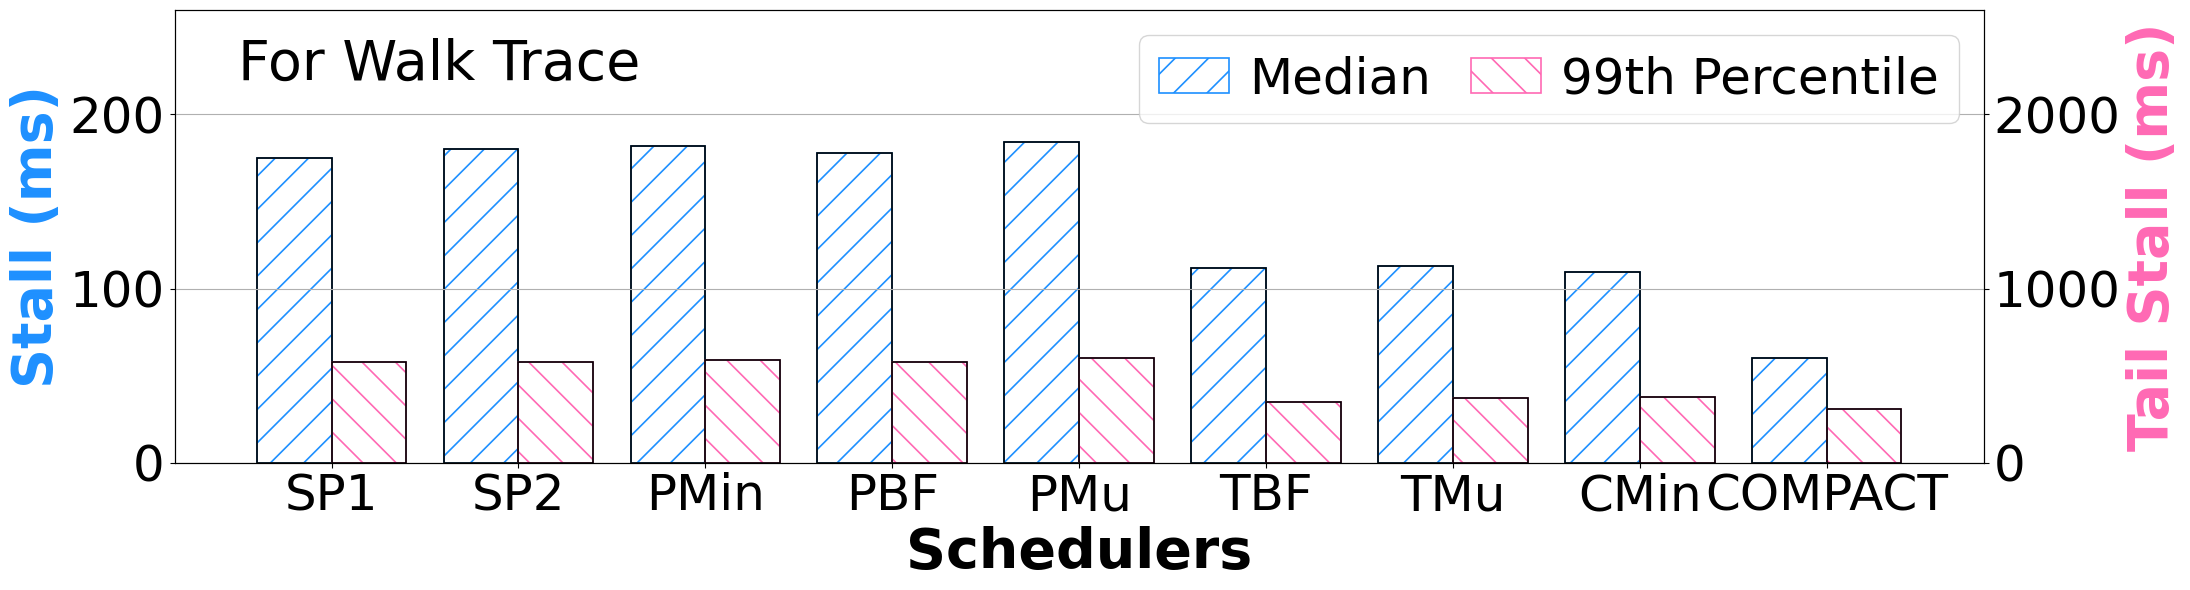

In [27]:
# Stall bar plot for all videos together
c1, c2 = "dodgerblue", "hotpink"
# c1, c2 = "brown", "green"

plt.figure(figsize=(22, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

b1 = ax1.bar(np.arange(len(concatedStallsMedian)) - 0.2, concatedStallsMedian, width=0.4, label="Median", linewidth=1.2, edgecolor=c1, fill=False, hatch="/", zorder=2)
ax1.bar(np.arange(len(concatedStallsMedian)) - 0.2, concatedStallsMedian, width=0.4, linewidth=1.2, edgecolor="k", fill=False, zorder=2)
b2 = ax2.bar(np.arange(len(concatedStalls99thPerc)) + 0.2, concatedStalls99thPerc, width=0.4, label="99th Percentile", linewidth=1.2, edgecolor=c2, fill=False, hatch="\\", zorder=2)
ax2.bar(np.arange(len(concatedStalls99thPerc)) + 0.2, concatedStalls99thPerc, width=0.4, linewidth=1.2, edgecolor="k", fill=False, zorder=2)

ax1.set_xlabel("Schedulers", fontsize=40, weight="bold")
ax1.set_ylabel("Stall (ms)", fontsize=40, color=c1, weight="bold")
ax2.set_ylabel("Tail Stall (ms)", fontsize=40, color=c2, weight="bold")
ax1.tick_params(labelsize=36)
ax2.tick_params(labelsize=36)
ax1.set_ylim(0, 260)
ax2.set_ylim(0, 2600)
plt.xticks(np.arange(len(_Methods)), _Methods)

plt.grid()
plt.legend([b1, b2], ["Median", "99th Percentile"], fontsize=36, ncol=2, handlelength=1.4, columnspacing=0.8, handletextpad=0.4)
plt.text(-0.5, 2200, f"For {trace_cap} Trace", fontsize=40)
plt.tight_layout()
# plt.savefig(f"Results/Plots/Stall/bar_stall_{trace}.pdf", bbox_inches="tight")
# plt.savefig(f"Results/Plots/Stall/bar_stall_{trace}.png", bbox_inches="tight")

# E2E Lag (Fig 12b)

In [32]:
# Change trace name to get corresponding plot (Car, Bus, Walk)
# Aggregate plot
trace_cap = "Walk"
trace = trace_cap.lower()
videos = ["Video2", "Video3", "Video4", "Video5"]
_Methods = ["SP1", "SP2", "PMin", "PBF", "PMu", "TBF", "TMu", "CMin", "COMPACT"]
schedulers = ["PSP1", "PSP2", "PminRTT", "Pbflow", "Pmusher", "Tbflow", "Tmusher", "TminRTT", "Tours"]

lags = [] # dim0 = videos, dim1 = schedulers, and dim3 = samples
for video in videos:
    lg = [] # to store lags for scheduler in the order
            # SP1, SP2, PminRTT, Pbflow, Pmusher, TminRTT, Tbflow, Tmusher, ours
    for scheduler in schedulers:    
        # E2E lag
        lg.append(jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_new_pkl_{scheduler}_{video}.pkl"))

    lags.append(lg)

# Concatenate all videos together
concatedLags, concatedLagsMedian, concatedLags99thPerc = [], [], [] # schedulers
for sc in range(len(_Methods)):
    tmp = []
    for vd in range(len(videos)):
        tmp += lags[vd][sc]
    # print(f"For {_Methods[sc]} {videos[vd]}")
    concatedLags.append(tmp)
    concatedLagsMedian.append(np.median(tmp))
    concatedLags99thPerc.append(np.percentile(tmp, 99))    

In [15]:
# len(lags[0])
# concatedLagsMedian # bus sp=1.4x, pbf=1.3,
# concatedLagsMedian # car sp=1.4x, pbf=1.3, 
# concatedLagsMedian # walk sp=1.3x, pbf=1.2, Tbf=1.1x  
# concatedLags99thPerc # bus sp1=1x, sp2=4.9x, Pmin=0.9x, Pmu=3.7x, Tmu=1.7x, cmin=2.2x    
# concatedLags99thPerc # car sp1=2.1x, sp2=0.67x, Pmin=0.9x, Pmu=3.7x, Tbf=1.1x, cmin=-1.2x 
# concatedLags99thPerc # walk sp1=2.6x, sp2=0.9x, Pmin=1.9x, Pmu=2.6x, Tmu=2.5x, cmin=1.8x 

In [716]:
# concatedLags99thPerc # car sp1=2.1x, sp2=0.67x, Pmin=0.9x, Pmu=3.7x, Tbf=1.1x, cmin=-1.2x 
# concatedLagsMedian

In [717]:
# concatedLags99thPerc # walk sp1=2.6x, sp2=0.9x, Pmin=1.9x, Pmu=2.6x, Tmu=2.5x, cmin=1.8x 

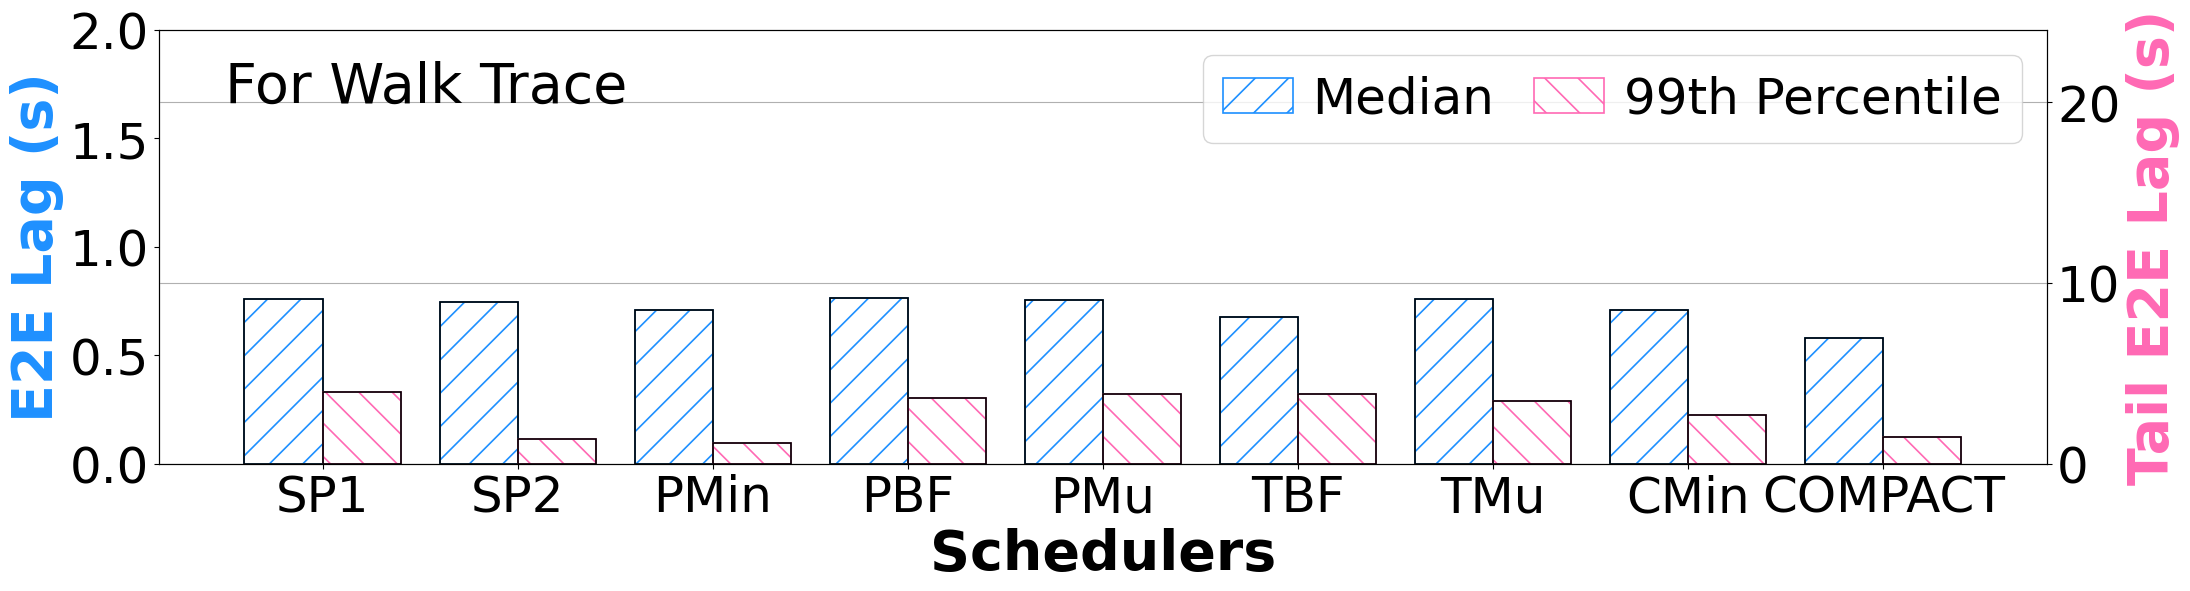

In [ ]:
# Bar plots for E2E lag for all videos
c1, c2 = "dodgerblue", "hotpink"
# c1, c2 = "brown", "green"
plt.figure(figsize=(22, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

b1 = ax1.bar(np.arange(len(concatedLagsMedian)) - 0.2, concatedLagsMedian, width=0.4, label="Median", linewidth=1.2, edgecolor=c1, fill=False, hatch="/", zorder=2)
ax1.bar(np.arange(len(concatedLagsMedian)) - 0.2, concatedLagsMedian, width=0.4, linewidth=1.2, edgecolor="k", fill=False, zorder=2)
b2 = ax2.bar(np.arange(len(concatedLags99thPerc)) + 0.2, concatedLags99thPerc, width=0.4, label="99th Percentile", linewidth=1.2, edgecolor=c2, fill=False, hatch="\\", zorder=2)
ax2.bar(np.arange(len(concatedLags99thPerc)) + 0.2, concatedLags99thPerc, width=0.4, linewidth=1.2, edgecolor="k", fill=False, zorder=2)

ax1.set_xlabel("Schedulers", fontsize=40, weight="bold")
ax1.set_ylabel("E2E Lag (s)", fontsize=40, color=c1, weight="bold")
ax2.set_ylabel("Tail E2E Lag (s)", fontsize=40, color=c2, weight="bold")
ax1.tick_params(labelsize=36)
ax2.tick_params(labelsize=36)
ax1.set_ylim(0, 2)
ax2.set_ylim(0, 24)
# ax2.set_ylim(0, 11)
plt.xticks(np.arange(len(_Methods)), _Methods)

plt.grid()
plt.legend([b1, b2], ["Median", "99th Percentile"], fontsize=36, ncol=2, handlelength=1.4, columnspacing=0.8, handletextpad=0.4)
plt.text(-0.5, 20, f"For {trace_cap} Trace", fontsize=40)
plt.tight_layout()
# plt.savefig(f"Results/Plots/E2Elag/bar_lag_{trace}.pdf", bbox_inches="tight")
# plt.savefig(f"Results/Plots/E2Elag/bar_lag_{trace}.png", bbox_inches="tight")

# Live Results (Fig 16 a and b)

In [93]:
# Lag
lag_live = np.array(jb.load(f"Results/E2Elag/traces/Live/live/lag_pkl_Tours_live.pkl"))

# Stall
with open(f"Results/Stalls/traces/Live/Multipath_tilelevel_ours_live.txt" , "r") as f:
    d = f.read().split("\n")[20:-1] 
stall_live = [(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ]

stall_live_median = np.median(stall_live)
lag_live_median = np.median(lag_live)
lag_live_percentile = np.percentile(lag_live, 99)
stall_live_percentile = np.percentile(stall_live, 99)

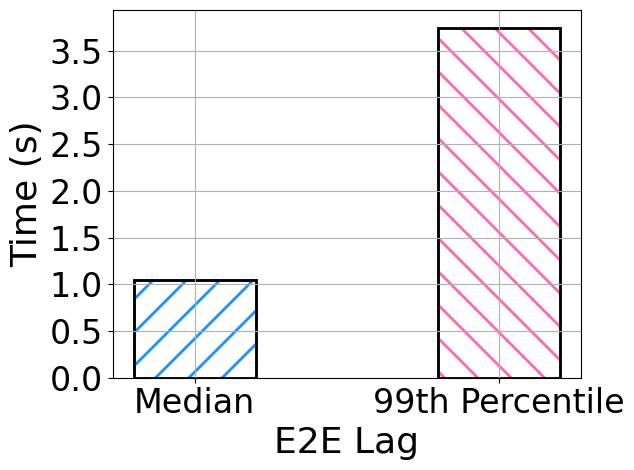

In [94]:
# Lag
mpl.rcParams['hatch.linewidth'] = 2

# plt.bar([1, 2], [stall_live_median, stall_live_percentile])
b = plt.bar([1, 2], [lag_live_median, lag_live_percentile], edgecolor="dodgerblue", fill=False, hatch="/", linewidth=2, width=0.4)
plt.bar([1, 2], [lag_live_median, lag_live_percentile], edgecolor="black", fill=False, linewidth=2, width=0.4)
b[1].set(color="hotpink")
b[1].set(hatch="\\")
# plt.yscale("log")
plt.xlabel("E2E Lag", fontsize=26)
plt.ylabel("Time (s)", fontsize=26)
plt.xticks([1, 2], ["Median", "99th Percentile"], fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.tight_layout()
plt.savefig(f"Results/Plots/E2Elag/live/bar_lag_live.pdf", bbox_inches="tight")
# plt.savefig(f"Results/Plots/E2Elag/live/bar_lag_live.png", bbox_inches="tight")

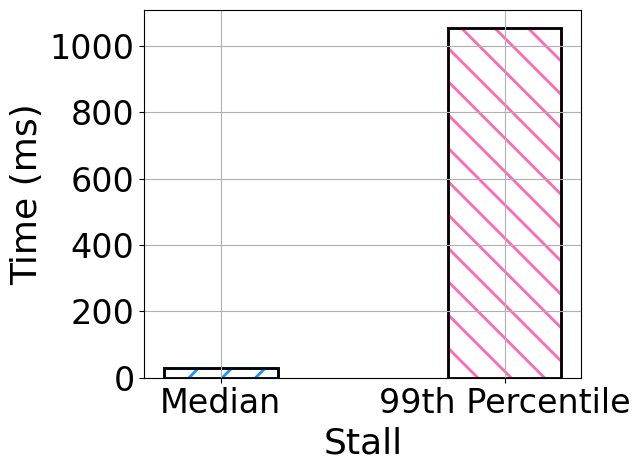

In [95]:
# Stall
mpl.rcParams['hatch.linewidth'] = 2

# plt.bar([1, 2], [stall_live_median, stall_live_percentile])
b = plt.bar([1, 2], [stall_live_median, stall_live_percentile], edgecolor="hotpink", fill=False, hatch="/", linewidth=2, width=0.4)
plt.bar([1, 2], [stall_live_median, stall_live_percentile], edgecolor="black", fill=False, linewidth=2, width=0.4)
b[0].set(color="dodgerblue")
b[1].set(hatch="\\")
# plt.yscale("log")
plt.xlabel("Stall", fontsize=26)
plt.ylabel("Time (ms)", fontsize=26)
plt.xticks([1, 2], ["Median", "99th Percentile"], fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.tight_layout()
plt.savefig(f"Results/Plots/Stall/live/bar_stall_live.pdf", bbox_inches="tight")
# plt.savefig(f"Results/Plots/Stall/live/bar_stall_live.png", bbox_inches="tight")

In [13]:
# RTT and BW
with open(f"Results/Plots/E2Elag/live/rtt_ipv6.txt" , "r") as f:
    rtt = f.read().split("\n")[:-1]  

with open(f"Results/Plots/E2Elag/live/bw_ipv6.txt" , "r") as f:
    bw = f.read().split("\n")[:-1]      

_rtt, _bw = [], []
for jj in rtt:
    r = float(jj.split(" ")[-2].split("=")[-1])
    _rtt.append(r)
for kk in bw:
    b = float(kk.split(" ")[0])
    # print(b)
    if b > 10:
        b = b/1000
    _bw.append(b)


In [14]:
# rtt[0].split(" ")
# rtt[0].split(" ")[-2].split("=")[-1]
# bw[40].split(" ")
# bw[0]
# _bw
np.mean(_rtt)

425.64938271604944

In [15]:
np.mean(_bw)

0.8334

# Fault tolerance (Fig 15)

In [96]:
# Traces
def plotBWToPlot(filename: str) -> tuple[np.ndarray, np.ndarray]:
    PACKET_SIZE = 1500.0  # bytes
    BITS_IN_BYTE = 8.0
    MBITS_IN_BITS = 1000000.0
    MILLISECONDS_IN_SECONDS = 1000.0
    N = 100
    LINK_FILE = filename

    time_all = []
    packet_sent_all = []
    last_time_stamp = 0
    packet_sent = 0
    with open(LINK_FILE, 'rb') as f:
        for line in f:
            time_stamp = int(line.split()[0])
            if time_stamp == last_time_stamp:
                packet_sent += 1
                continue
            else:
                time_all.append(last_time_stamp)
                packet_sent_all.append(packet_sent)
                packet_sent = 1
                last_time_stamp = time_stamp

    time_window = np.array(time_all[1:]) - np.array(time_all[:-1])
    throuput_all = (PACKET_SIZE * \
                BITS_IN_BYTE * \
                np.array(packet_sent_all[1:]) / \
                time_window * \
                MILLISECONDS_IN_SECONDS / \
                MBITS_IN_BITS) / 1
    
    return np.array(time_all[1:]) / MILLISECONDS_IN_SECONDS, np.convolve(throuput_all, np.ones(N,)/N, mode='same')

# x, y = plotBWToPlot("../Mahimahi/Traces/fault_tolerance/1.5mbps_fluctuated_trace")
# x, y = plotBWToPlot("../Mahimahi/Traces/fault_tolerance/1.5mbps_fluctuated_trace2")
# plt.plot(x, y)
# plt.xlabel('Time (second)')
# plt.ylabel('Throughput (Mbit/sec)')
# plt.show()

In [97]:
numFGTiles, numBGTiles, ts = [], [], []
# with open(f"fault_tolerance/QP_faulttolerance_Video4_new1.txt" , "r") as f:
with open(f"Results/Mahimahi/Traces/fault_tolerance/QP_fault_tolerance_10:50PM_mid.txt" , "r") as f:
    d = f.read().split("\n")[20:-1]  
for i in d:
    # numFGTiles.append(int(i.split(" ")[-3]))
    # numBGTiles.append(int(i.split(" ")[-2]))
    ts.append(int(i.split(" ")[-1]))
    numFGTiles.append(int(i.split(" ")[-4]))
    numBGTiles.append(int(i.split(" ")[-3]))

# Fixing 4 tiles per second
step = 4
numFGTiles_new, numBGTiles_new = [], []
for j in range(0, len(numFGTiles)- step, step):
    numFGTiles_new.append(np.ceil(np.mean(numFGTiles[j:j+step])))
    numBGTiles_new.append(np.ceil(np.mean(numBGTiles[j:j+step])))


In [98]:
# To use timestamps for esimating number of tiles in a sec
starting_ts = ts[0]
numFGTiles_new, numBGTiles_new, nums = [], [], []
fgTiles, bgTiles, num =  0, 0, 0
for j in range(len(ts)):
    if ts[j] - starting_ts > 1000:
        numFGTiles_new.append(fgTiles/num)
        numBGTiles_new.append(bgTiles/num)
        nums.append(num)
        starting_ts = ts[j]
        fgTiles, bgTiles, num = 0, 0, 0    
    fgTiles += numFGTiles[j]
    bgTiles += numBGTiles[j]
    num += 1


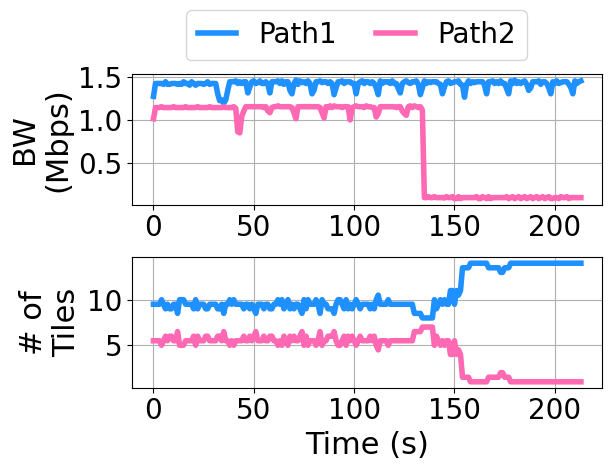

In [ ]:
# Mahimahi plots
# x1, y1 = plotBWToPlot("../Mahimahi/Traces/fault_tolerance/1.5mbps_fluctuated_trace")
# x2, y2 = plotBWToPlot("../Mahimahi/Traces/fault_tolerance/1.5mbps_fluctuated_trace2")

# Iperf plots
with open(f"Results/Mahimahi/Traces/fault_tolerance/fault_primary_iperf_start.txt" , "r") as f:
    d1 = f.read().split("\n")[6:-1]

with open(f"Results/Mahimahi/Traces/fault_tolerance/fault_helper_iperf_start.txt" , "r") as f:
    d2 = f.read().split("\n")[6:-1]

tput_path1, tput_path2 = [], []
for i in range(len(d1)):
    tput_path1.append(float(d1[i].split(" ")[-2]))
    tput_path2.append(float(d2[i].split(" ")[-2]))
tput_path1 = np.array(tput_path1)
tput_path2 = np.array(tput_path2)

indx = np.where(tput_path2 > 2)[0]
tput_path2[indx] = tput_path2[indx]/1000


plt.subplot(2, 1, 1)
plt.plot(np.arange(len(tput_path1[:-16])), tput_path1[:-16], label="Path1", color="dodgerblue", linewidth=4)
plt.plot(np.arange(len(tput_path2[:-16])), tput_path2[:-16], label="Path2", color="hotpink", linewidth=4)
plt.tight_layout()
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("BW\n(Mbps)", fontsize=22)
plt.legend(fontsize=20, ncol=2, columnspacing=1.4, handlelength=1.4, bbox_to_anchor=(0.086, 1))
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(numFGTiles_new))[:], numFGTiles_new[:], linewidth=4, color="dodgerblue", label="Path1")
plt.plot(np.arange(len(numBGTiles_new))[:], numBGTiles_new[:], linewidth=4, color="hotpink", label="Path2")
# plt.tight_layout()
plt.xlabel("Time (s)", fontsize=22)
plt.ylabel("# of\nTiles", fontsize=22)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
# plt.ylim(0, 18)
plt.tight_layout()
# plt.savefig("Results/Plots/fault_tolerance_tile_shifts.pdf", bbox_inches="tight")
# plt.savefig("Results/Plots/fault_tolerance_tile_shifts.png", bbox_inches="tight")

# Traces' plots (Fig 11 a, b, and c)

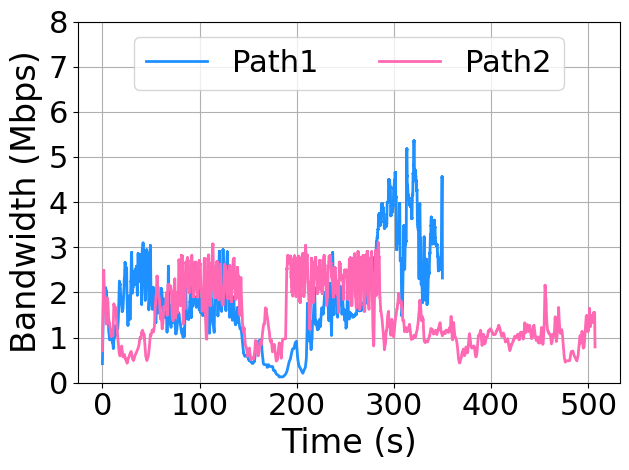

In [139]:
# Uncomment the lines corresponsing to each trace "bus", "car", or "walking" and pass its name below
trace = "car"
color = ["dodgerblue", "hotpink"]

# # # bus
# x1, y1 = plotBWToPlot(f"Results/Mahimahi/Traces/belgium_logs_all_pensieve/mahimahi_with_scaling_20/report_{trace}_0001.log")
# x2, y2 = plotBWToPlot(f"Results/Mahimahi/Traces/belgium_logs_all_pensieve/mahimahi_with_scaling_20/report_{trace}_0003.log")

# car
x1, y1 = plotBWToPlot(f"Results/Mahimahi/Traces/belgium_logs_all_pensieve/mahimahi_with_scaling_20/report_{trace}_0001.log")
x2, y2 = plotBWToPlot(f"Results/Mahimahi/Traces/belgium_logs_all_pensieve/mahimahi_with_scaling_20/report_{trace}_0004.log")
 
# # walk
# x1, y1 = plotBWToPlot(f"Results/Mahimahi/Traces/ours/throughput_from_pcap/trace_files/myphone_{trace}_airtel_mahimahi")
# x2, y2 = plotBWToPlot(f"Results/Mahimahi/Traces/ours/throughput_from_pcap/trace_files/myphone_{trace}_sumit_airtel_mahimahi")

plt.plot(x1, y1, linewidth=2, color=color[0], label="Path1")
plt.plot(x2, y2, linewidth=2, color=color[1], label="Path2")
plt.xlabel("Time (s)", fontsize=24)
plt.ylabel("Bandwidth (Mbps)", fontsize=24)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.legend(fontsize=22, ncol=2, loc="upper center")
plt.ylim(0, 8)
# plt.ylim(0, 110)
plt.grid()
plt.tight_layout()
# plt.savefig(f"Results/Plots/traces/{trace}.pdf", bbox_inches="tight")
# plt.savefig(f"Results/Plots/traces/{trace}.png")

# Quality (Fig 14)

98.2975 90.2825


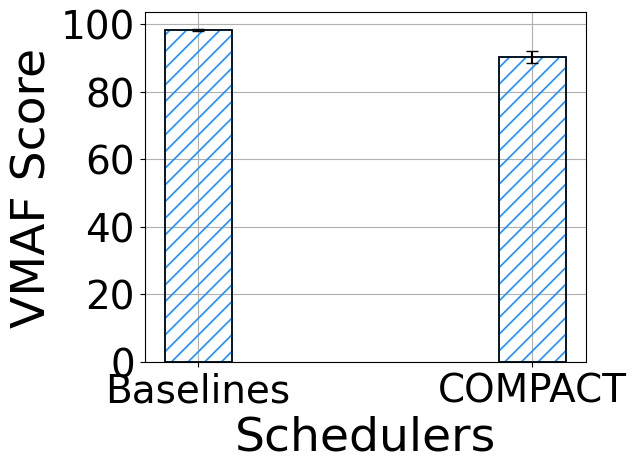

In [109]:
# Used ffmpeg to get VMAF using the below command:
# ffmpeg -i compact_received_video2.mp4 -i compact_server_video2.mp4 -lavfi libvmaf -f null -
# Note that because we keep the same quality level (QP) for all the baselines
# therefore VMAF will also be same that's why we only include result for pBflow
compactVMAF: list[float] = [89.40, 93.31, 88.35, 90.07] # vmafs from ffmpeg calculated separately
pbflowVMAF: list[float] = [98.19, 98.74, 98.38, 97.88]  # vmafs from ffmpeg calculated separately
print(np.mean(pbflowVMAF), np.mean(compactVMAF))

mpl.rcParams['hatch.linewidth'] = 1.2
plt.bar(np.arange(2), [np.mean(pbflowVMAF), np.mean(compactVMAF)], width=0.2, label="COMPACT", linewidth=1.2, edgecolor="dodgerblue", fill=False, hatch="//", zorder=2, yerr=[np.std(pbflowVMAF), np.std(compactVMAF)], capsize=4)
plt.bar(np.arange(2), [np.mean(pbflowVMAF), np.mean(compactVMAF)], width=0.2, linewidth=1.2, edgecolor="k", fill=False, zorder=2)
# plt.ylim(0, 1.16)
plt.xlabel("Schedulers", fontsize=34)
plt.ylabel("VMAF Score", fontsize=34)
plt.xticks(np.array([0, 1]), ["Baselines", "COMPACT"], fontsize=28)
plt.yticks(fontsize=28)
plt.grid()
plt.tight_layout()
# plt.legend(fontsize=20, ncol=2, loc="upper center")
# plt.savefig(f"Results/Plots/videoQuality_barplot_allvideo_bus.pdf", bbox_inches="tight")
# plt.savefig(f"Results/Plots/videoQuality_barplot_allvideo_bus.png", bbox_inches="tight")

# Out of order FG and BG Playback (Fig 13)

In [110]:
traces = ["Bus", "Car", "Walk"]
videos = ["Video2", "Video3", "Video4", "Video5"]

traceWiseTriggers = []
outOfSyncPlayback, total = 0, 0
for t in traces:
    o, tt = 0, 0
    for v in videos: 
        with open(f"Results/OutOfOrderPlayback/Multipath_stalls_ours_{v}_{t.lower()}.txt", "r") as f:
            dd = f.read().split("\n")[1:-1]

        for i in dd:
            tt += 1
            total += 1
            fg_seg_indx = int(i.split(" ")[-2])
            bg_seg_indx = int(i.split(" ")[-1])
            diff = fg_seg_indx - bg_seg_indx
            if diff != 0:
                o += 1
                outOfSyncPlayback += 1
    traceWiseTriggers.append((o/tt)*100)


In [64]:
# outOfSyncPlayback/len(dd)
# outOfSyncPlayback/total
traceWiseTriggers

[46.83481701285855, 43.547963206307486, 40.281763631620144]

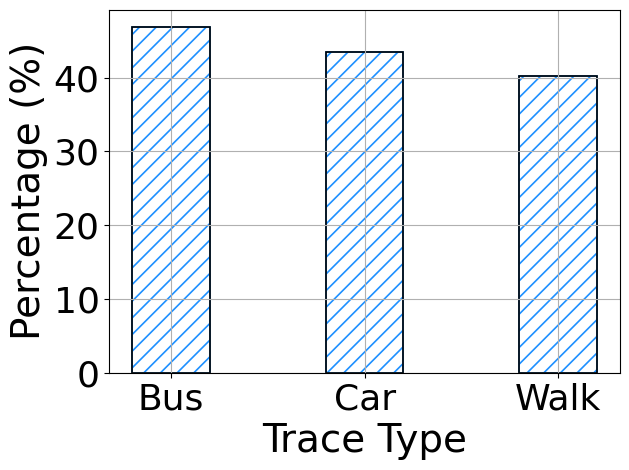

In [111]:
mpl.rcParams['hatch.linewidth'] = 1.2

plt.bar([1, 2, 3], traceWiseTriggers, edgecolor="dodgerblue", fill=False, hatch="//", linewidth=1.2, width=0.4)
plt.bar([1, 2, 3], traceWiseTriggers, edgecolor="black", fill=False, linewidth=1.2, width=0.4)
# plt.yscale("log")
plt.xlabel("Trace Type", fontsize=28)
plt.ylabel("Percentage (%)", fontsize=28)
plt.xticks([1, 2, 3], traces, fontsize=26)
plt.yticks(fontsize=26)
plt.grid()
plt.tight_layout()
plt.savefig(f"Results/Plots/outOfSyncPlayback.pdf", bbox_inches="tight")

# Microbenchmarks (For Table 1)

In [35]:
with open("Results/microbenchmarks/Component_time_logs", "r") as f:
    d = f.read().split("\n")[:-2]

fg_detection_time, encoding_time = [], []
for i, line in enumerate(d):
    # print(i)
    id, value = line.split("] ")
    if id == "[FG Detection Time":
        fg_detection_time.append(float(value))
    elif "[Encoding Time" in line:
        encoding_time.append(float(value))


In [36]:
np.mean(fg_detection_time)
# np.mean(encoding_time)

56.69

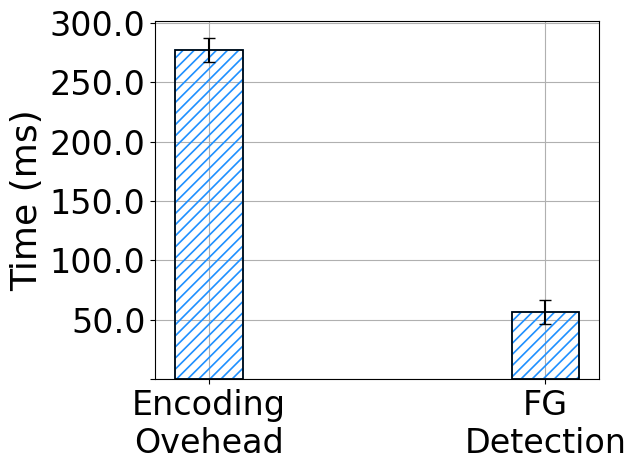

In [37]:
# plt.boxplot([fg_detection_time, encoding_time])#, showfliers=False)
# plt.bar([1, 2], [np.mean(fg_detection_time), np.mean(encoding_time)], yerr=[np.std(fg_detection_time), np.std(encoding_time)], width=0.2, color="dodgerblue")
b2 = plt.bar([1, 2], [np.mean(encoding_time), np.mean(fg_detection_time)], yerr=[np.std(encoding_time), np.std(fg_detection_time)], linewidth=1.2, edgecolor="dodgerblue", fill=False, hatch="///", width=0.2, zorder=2, capsize=4)
plt.bar([1, 2], [np.mean(encoding_time), np.mean(fg_detection_time)], linewidth=1.2, edgecolor="k", fill=False, width=0.2, zorder=2)
# plt.bar([1+0.1, 2+0.1], [1000*np.mean(rem_lat_30_m), 1000*np.mean(rem_lat_10_m)], linewidth=1.2, edgecolor="k", fill=False, width=0.2, zorder=2)#, yerr=[np.std(all_lat_30), np.std(rem_lat_30)], capsize=4, zorder=2)

func = lambda x, pos: "" if np.isclose(x, 0) else x
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(func))

plt.xlabel("", fontsize=26)
plt.ylabel("Time (ms)", fontsize=26)
# plt.ylim(0, 3)
plt.xticks([1, 2], ["Encoding\nOverhead", "FG\nDetection"], fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.tight_layout()
# plt.show()
# plt.savefig(f"Results/Plots/microbenchmarks.png", bbox_inches="tight")

# Video-wise Results (Fig 17)

In [2]:
trace = "bus"
videos = ["Video2", "Video3", "Video4", "Video5"]
_Methods = ["SP1", "SP2", "PMin", "PBF", "PMu", "TBF", "TMu", "CMin", "COMPACT"]

videoStalls = [] 
videoLags = [] 
for video in videos:
    # E2E lag
    lag, stall = [], []
    lag.append(jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_new_pkl_PSP1_{video}.pkl"))
    lag.append(jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_new_pkl_PSP2_{video}.pkl"))
    lag.append(jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_new_pkl_PminRTT_{video}.pkl"))
    lag.append(jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_new_pkl_Pbflow_{video}.pkl"))
    lag.append(jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_new_pkl_Pmusher_{video}.pkl"))
    lag.append(jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_new_pkl_Tbflow_{video}.pkl") )
    lag.append(jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_new_pkl_Tmusher_{video}.pkl"))
    lag.append(jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_new_pkl_TminRTT_{video}.pkl"))
    lag.append(jb.load(f"Results/E2Elag/traces/{trace}/{video}/lag_new_pkl_Tours_{video}.pkl"))
    videoLags.append(lag)
    
    # Stall
    # -40 because 40 is acceptable stall duration
    with open(f"Results/Stalls/traces/{trace}/Multipath_pkt_level_SP1_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]  
    stall.append([(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ])

    with open(f"Results/Stalls/traces/{trace}/Multipath_pkt_level_SP2_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]  
    stall.append([(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ])

    with open(f"Results/Stalls/traces/{trace}/Multipath_pkt_level_minRTT_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]  
    stall.append([(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ])

    with open(f"Results/Stalls/traces/{trace}/Multipath_pkt_level_bflow_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]  
    stall.append([(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ])

    with open(f"Results/Stalls/traces/{trace}/Multipath_pkt_level_musher_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]   
    stall.append([(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ])

    with open(f"Results/Stalls/traces/{trace}/Multipath_tilelevel_bflow_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]    
    stall.append([(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ])

    with open(f"Results/Stalls/traces/{trace}/Multipath_tilelevel_musher_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1] 
    stall.append([(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ])

    with open(f"Results/Stalls/traces/{trace}/Multipath_tilelevel_minRTT_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]   
    stall.append([(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ])

    with open(f"Results/Stalls/traces/{trace}/Multipath_tilelevel_ours_{trace}_{video}.txt" , "r") as f:
        d = f.read().split("\n")[20:-1]  
    stall.append([(int(i.split(" ")[1]) - 40) for i in d if i[1:4] == "SFB" ])
    videoStalls.append(stall)

# SP1, SP2, PminRTT, Pbflow, Pmusher, TminRTT, Tbflow, Tmusher, ours
videoLagsMean, videoLagsStd, videoStallsMean, videoStallsStd = [], [], [], []
for v in range(len(videos)):
    lagMean, lagStd, stallMean, stallStd = [], [], [], []
    for m in range(len(_Methods)):
        lagMean.append(np.mean(videoLags[v][m])) # in seconds
        lagStd.append(np.std(videoLags[v][m])) # in seconds
        stallMean.append(np.mean(videoStalls[v][m])/1000) # in seconds
        stallStd.append(np.std(videoStalls[v][m])/1000) # in seconds
    videoLagsMean.append(lagMean)
    videoLagsStd.append(lagStd)
    videoStallsMean.append(stallMean)
    videoStallsStd.append(stallStd)    

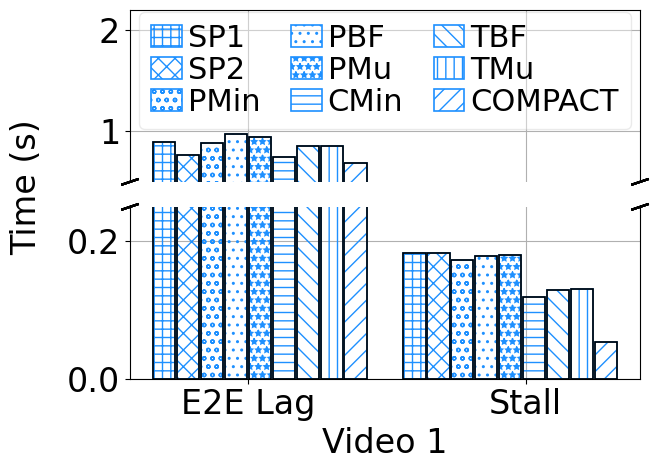

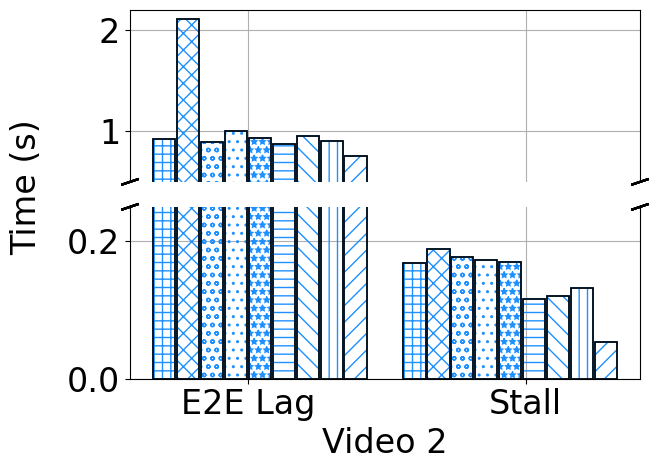

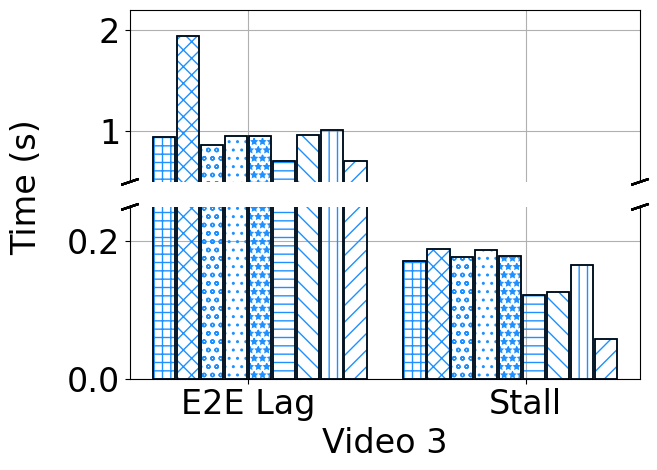

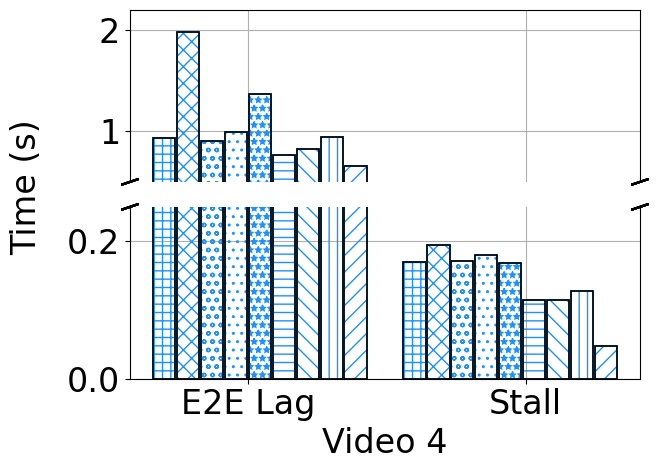

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

_colors = ["blue", "black", "dimgrey", "limegreen", "darkorange", "brown", "teal", "hotpink"]#, 'dodgerblue']
_Methods = ["SP1", "SP2", "PMin", "PBF", "PMu", "CMin", "TBF", "TMu", "COMPACT"]
_markers = ["++", "xx", "oo", "..", "**", "--", "\\\\", "||", "//"]

# With broken lines
for v in range(len(videos)):
#     plt.title(f"Video {v+1}", fontsize=24)
    fig, axes = plt.subplots(nrows=1, sharex=True)
    divider = make_axes_locatable(axes)
    newAxes = divider.new_vertical(size="100%", pad=0.25)
    fig.add_axes(newAxes)
    for m in range(len(_Methods)):
        axes.bar(np.array([1,10]) + 0.86*m, [videoLagsMean[v][m], videoStallsMean[v][m]], width=0.8, label=_Methods[m], linewidth=1.2, edgecolor="dodgerblue", fill=False, hatch=_markers[m], zorder=2)#, yerr=videoLagsStd[v], capsize=2)
        axes.bar(np.array([1,10]) + 0.86*m, [videoLagsMean[v][m], videoStallsMean[v][m]], width=0.8, linewidth=1.2, edgecolor="k", fill=False, zorder=2)
        axes.set_ylim(0, 0.25)
        axes.spines['top'].set_visible(False)
        newAxes.bar(np.array([1,10]) + 0.86*m, [videoLagsMean[v][m], videoStallsMean[v][m]], width=0.8, label=_Methods[m], linewidth=1.2, edgecolor="dodgerblue", fill=False, hatch=_markers[m], zorder=2)#, yerr=videoLagsStd[v], capsize=2)
        newAxes.bar(np.array([1,10]) + 0.86*m, [videoLagsMean[v][m], videoStallsMean[v][m]], width=0.8, linewidth=1.2, edgecolor="k", fill=False, zorder=2)
        newAxes.set_ylim(0.5, 2.2)
        newAxes.tick_params(bottom=False, labelbottom=False)
        newAxes.spines['bottom'].set_visible(False)
        
        # From https://matplotlib.org/examples/pylab_examples/broken_axis.html
        d = .015  # how big to make the diagonal lines in axes coordinates
        # arguments to pass to plot, just so we don't keep repeating them
        kwargs = dict(transform=newAxes.transAxes, color='k', clip_on=False)
        newAxes.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
        newAxes.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

        kwargs.update(transform=axes.transAxes)  # switch to the bottom axes
        axes.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
        axes.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
        
    axes.set_xlabel(f"Video {v+1}", fontsize=24)
    axes.set_ylabel("Time (s)", fontsize=24)
    axes.yaxis.set_label_coords(0.032, 0.6, transform=fig.transFigure)
    axes.set_xticks([4, 14], ["E2E Lag", "Stall"], fontsize=24)
    axes.tick_params(axis="y", labelsize=24)
    newAxes.set_xticks([4, 14], ["E2E Lag", "Stall"], fontsize=24)
    newAxes.tick_params(axis="y", labelsize=24)
    axes.grid(True)
    newAxes.grid(True)
    if v == 0: # shows legend in last subplot
        # plt.legend(fontsize=22, ncol=3, bbox_to_anchor=(0.6, 1.06), handlelength=1, handletextpad=0.2, columnspacing=1, labelspacing=0.1)
        plt.legend(fontsize=22, ncol=3, loc="upper center", bbox_to_anchor=(0.5, 1.08), framealpha=0.4, handlelength=1, handletextpad=0.2, columnspacing=1, labelspacing=0.1)
    fig.align_ylabels()
    fig.tight_layout()    
    plt.savefig(f"Results/Plots/videoWise_barplot_video{v+1}_{trace}_brokenAxis.pdf", bbox_inches="tight")
    # plt.cla()
    # plt.clf()